In [57]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork
from FlowStability import SparseClustering, FlowIntegralClustering, run_multi_louvain, avg_norm_var_information
import parallel_clustering
import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh

from SparseStochMat import sparse_autocov_mat
import auxiliary_functions

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.image as mpimg
import networkx as nx

In [49]:
events = []
for i in range(4):
    group = i * 3
    for j in range(3):
        for k in range(j+1,3):
                events.append((group + j, group + k))

source_nodes = []
target_nodes = []
starting_times = []
ending_times = []

for event in events:
     source_nodes.append(event[0])
     target_nodes.append(event[1])
     starting_times.append(0)
     ending_times.append(10)
    

for i in range(2):
    group = i * 6
    for j in range(3):
         for k in range(group+3, group+6):
              events.append((group + j, k))
              source_nodes.append(group + j)
              target_nodes.append(k)
              starting_times.append(0)
              ending_times.append(5)

for i in range(3,6):
    group = i * 6
    for j in range(6,9):
              events.append((i, j))
              source_nodes.append(i)
              target_nodes.append(j)
              starting_times.append(5)
              ending_times.append(10)

In [50]:
print(events)
print(source_nodes)
print(target_nodes)
print(starting_times)
print(ending_times)

[(0, 1), (0, 2), (1, 2), (3, 4), (3, 5), (4, 5), (6, 7), (6, 8), (7, 8), (9, 10), (9, 11), (10, 11), (0, 3), (0, 4), (0, 5), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (6, 9), (6, 10), (6, 11), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (3, 6), (3, 7), (3, 8), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8)]
[0, 0, 1, 3, 3, 4, 6, 6, 7, 9, 9, 10, 0, 0, 0, 1, 1, 1, 2, 2, 2, 6, 6, 6, 7, 7, 7, 8, 8, 8, 3, 3, 3, 4, 4, 4, 5, 5, 5]
[1, 2, 2, 4, 5, 5, 7, 8, 8, 10, 11, 11, 3, 4, 5, 3, 4, 5, 3, 4, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 6, 7, 8, 6, 7, 8, 6, 7, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [51]:
net = ContTempNetwork(source_nodes=source_nodes, target_nodes=target_nodes, starting_times=starting_times, ending_times=ending_times)

In [55]:
static_adjacency_matrix = net.compute_static_adjacency_matrix().toarray() != 0

In [60]:
static_net = nx.Graph(static_adjacency_matrix)

In [61]:
comm = nx.community.greedy_modularity_communities(static_net)

In [62]:
comm

[frozenset({0, 1, 2, 3, 4, 5}), frozenset({6, 7, 8, 9, 10, 11})]

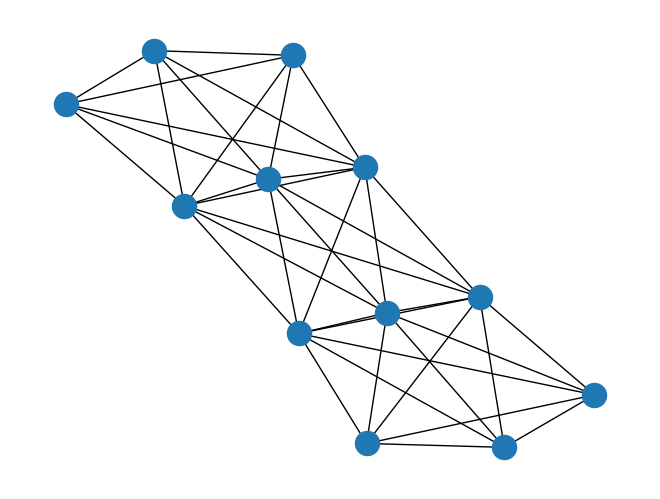

In [63]:
nx.draw(static_net)